In [12]:
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# 从 CSV 文件中读取数据并转换为 DataFrame
df_drop = pd.read_csv('df_drop.csv')
df = pd.read_csv('df.csv')

#导入数据
train=pd.read_csv('pfm_train.csv')


In [13]:
# 定义变量名映射字典
rename_dict = {
    'Attrition': '离职',
    'Age': '年龄',
    'MonthlyIncome': '月收入',
    'NumCompaniesWorked': '工作公司数',
    'PercentSalaryHike': '薪资涨幅百分比',
    'TotalWorkingYears': '总工作年限',
    'TrainingTimesLastYear': '去年培训次数', 
    'YearsAtCompany': '公司工作年限',
    'YearsInCurrentRole': '当前职位年限',
    'YearsSinceLastPromotion': '上次晋升年限',
    'YearsWithCurrManager': '当前经理共事年限',
    'BusinessTravel': '出差频率',
    'DistanceFromHome': '家距离公司距离',
    'Education': '教育程度',
    'EnvironmentSatisfaction': '环境满意度',
    'JobInvolvement': '工作投入度',
    'JobLevel': '职位级别',
    'JobSatisfaction': '工作满意度',
    'PerformanceRating': '绩效评分',
    'RelationshipSatisfaction': '关系满意度',
    'StockOptionLevel': '股票期权级别',
    'WorkLifeBalance': '工作生活平衡',
    'Department_Research &Development': '部门_研发',
    'Department_Sales': '部门_销售',
    'EducationField_Life_Sciences': '教育领域_生命科学',
    'EducationField_Marketing': '教育领域_市场营销',
    'EducationField_Medical': '教育领域_医学',
    'EducationField_Other': '教育领域_其他',
    'EducationField_Technical Degree': '教育领域_技术学位',
    'Gender_Male': '性别_男',
    'JobRole_Human Resources': '职位_人力资源',
    'JobRole_Laboratory Technician': '职位_实验室技术员',
    'JobRole_Manager': '职位_经理',
    'JobRole_Manufacturing Director': '职位_制造总监',
    'JobRole_Research Director': '职位_研究总监',
    'JobRole_Research Scientist': '职位_研究科学家',
    'JobRole_Sales Executive': '职位_销售主管',
    'JobRole_Sales Representative': '职位_销售代表',
    'MaritalStatus_Married': '婚姻状况_已婚',
    'MaritalStatus_Single': '婚姻状况_单身',
    'OverTime_Yes': '加班_是',
    'Department_Research & Development': '部门_研发',  
    'EducationField_Life Sciences': '教育领域_生命科学'  
}

C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: correlation_lollipop.png


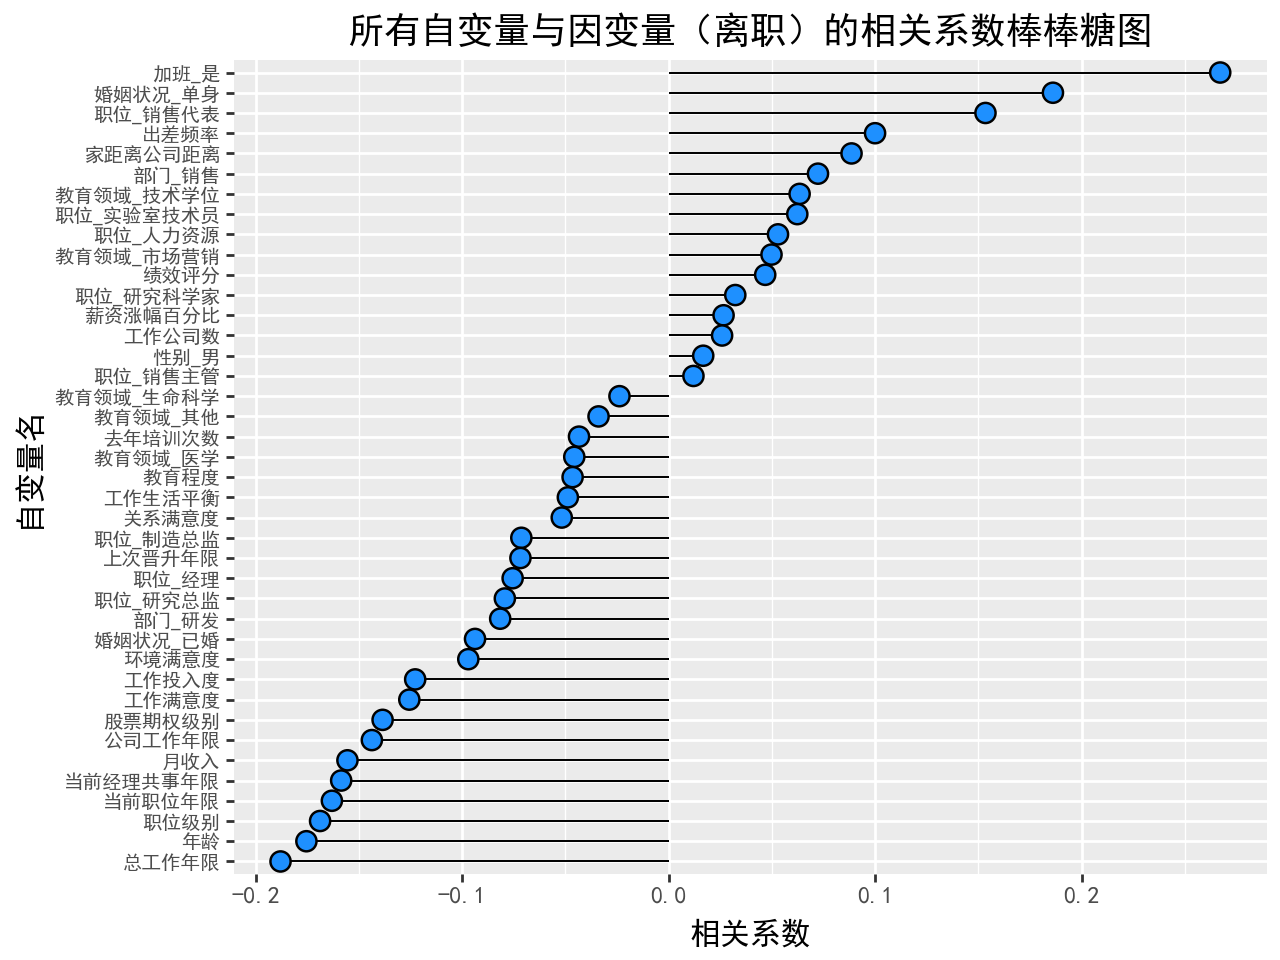

In [14]:

import pandas as pd
from plotnine import ggplot, aes, geom_segment, geom_point, theme, element_text, labs

# 计算相关性并排序
corr_series = df.corr().Attrition.sort_values(ascending=False)

# 移除目标变量与自身的相关性（通常为 1）
corr_series = corr_series.drop('Attrition')

# 将 Series 转换为 DataFrame
corr_df = corr_series.reset_index()
corr_df.columns = ['Feature', 'Correlation']

# 将变量名替换为中文
corr_df['Feature'] = corr_df['Feature'].map(rename_dict)

# 按相关性排序
corr_df = corr_df.sort_values('Correlation', ascending=False)
# print(corr_df)

# 绘制棒棒糖图
f2 = (
    ggplot(corr_df, aes(x='Correlation', y='reorder(Feature, Correlation)'))
    # 画直线
    + geom_segment(aes(x=0, xend='Correlation', y='Feature', yend='Feature'), color='k', size=0.4)
    # 画点并设置大小颜色等
    + geom_point(shape='o', size=3.6, color='k', fill='#1E90FF')
    # 设置字体
    + theme(
        text=element_text(family="SimHei"),  # 设置全局字体
        axis_text_y=element_text(size=7)    # 设置 y 轴变量名的字体大小
    )
    # 添加标题和标签
    + labs(x='相关系数', y='自变量名', title='所有自变量与因变量（离职）的相关系数棒棒糖图')
)

# 保存图形
f2.save('correlation_lollipop.png', dpi=180)

# 显示图形
f2.show()

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体（SimHei）作为默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算相关性矩阵
corr_matrix = df.corr()
corr_matrix = corr_matrix.rename(columns=rename_dict, index=rename_dict)

# 创建一个自定义的 annot 矩阵
annot_matrix = np.where(np.abs(corr_matrix) > 0.75, corr_matrix.round(2), '')

# 设置图形大小
plt.figure(figsize=(12, 8),dpi=900)

# 绘制热力图
sns.heatmap(
    corr_matrix,  # 相关性矩阵
    annot=annot_matrix,  # 使用自定义的 annot 矩阵
    fmt="",       # 不使用默认的格式化
    cmap='coolwarm',  # 颜色映射
    vmin=-1,      # 相关性最小值
    vmax=1,       # 相关性最大值
    linewidths=0.5,  # 单元格之间的线宽
    linecolor='k',  # 单元格之间的线颜色
    annot_kws={"fontsize": 5, "weight": "bold"}  # 调整数字大小
)

# 显示中文
matplotlib.rcParams['font.sans-serif']=['SimHei'] 


# 添加标题
plt.title('变量相关系数热力图', fontsize=16)

# 保存图形
plt.savefig('correlation_heatmap.png', dpi=300)

# 显示图形
plt.show()

# 输出变量名称和相关系数
print("变量对及其相关系数（|r| > 0.75）：")
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if np.abs(corr_matrix.iloc[i, j]) > 0.75:
            print(f"{corr_matrix.columns[i]} 和 {corr_matrix.columns[j]} 的相关系数为: {corr_matrix.iloc[i, j]:.2f}")

变量对及其相关系数（|r| > 0.75）：
月收入 和 总工作年限 的相关系数为: 0.77
月收入 和 职位级别 的相关系数为: 0.95
薪资涨幅百分比 和 绩效评分 的相关系数为: 0.76
总工作年限 和 职位级别 的相关系数为: 0.78
公司工作年限 和 当前职位年限 的相关系数为: 0.76
公司工作年限 和 当前经理共事年限 的相关系数为: 0.77
部门_研发 和 部门_销售 的相关系数为: -0.92
部门_研发 和 职位_销售主管 的相关系数为: -0.75
部门_销售 和 职位_销售主管 的相关系数为: 0.82


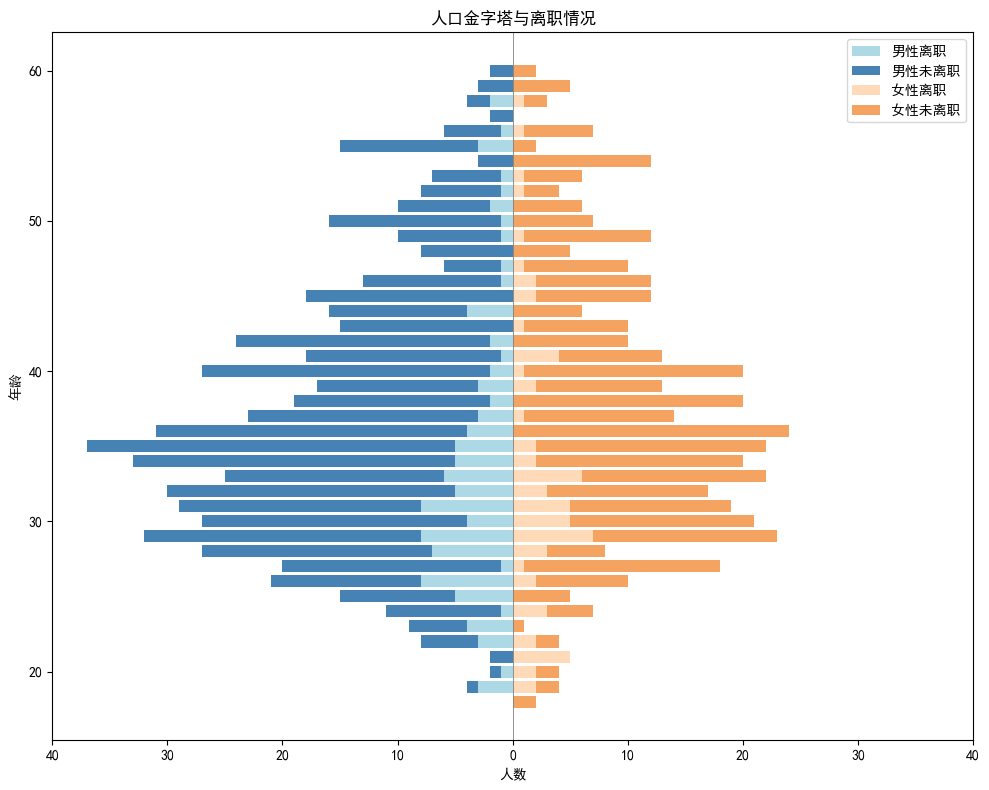

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体（SimHei）作为默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 按性别和年龄分组，统计离职和非离职的人数
male_data = df[df['Gender_Male'] == 1]  # 男性数据
female_data = df[df['Gender_Male'] == 0]  # 女性数据

# 获取所有年龄范围
all_ages = np.arange(df['Age'].min(), df['Age'].max() + 1)

# 统计男性离职和非离职的人数
male_attrition = male_data[male_data['Attrition'] == 1]['Age'].value_counts().reindex(all_ages, fill_value=0).sort_index()
male_no_attrition = male_data[male_data['Attrition'] == 0]['Age'].value_counts().reindex(all_ages, fill_value=0).sort_index()

# 统计女性离职和非离职的人数
female_attrition = female_data[female_data['Attrition'] == 1]['Age'].value_counts().reindex(all_ages, fill_value=0).sort_index()
female_no_attrition = female_data[female_data['Attrition'] == 0]['Age'].value_counts().reindex(all_ages, fill_value=0).sort_index()

# 创建画布
fig, ax = plt.subplots(figsize=(10, 8))

# 自定义颜色
male_color = '#4682B4'  # 男性未离职 - 蓝色
male_attrition_color = '#ADD8E6'  # 男性离职 - 红色
female_color = '#F4A460'  # 女性未离职 - 紫色
female_attrition_color = '#FFDAB9'  # 女性离职 - 红色

# 绘制男性堆积条形图（离职在下，未离职在上）
ax.barh(all_ages, -male_attrition, label='男性离职', color=male_attrition_color)
ax.barh(all_ages, -male_no_attrition, left=-male_attrition, label='男性未离职', color=male_color)

# 绘制女性堆积条形图（离职在下，未离职在上）
ax.barh(all_ages, female_attrition, label='女性离职', color=female_attrition_color)
ax.barh(all_ages, female_no_attrition, left=female_attrition, label='女性未离职', color=female_color)

# 设置 x 轴标签
ax.set_xlabel('人数')
ax.set_ylabel('年龄')

# 设置 x 轴范围对称
x_max = max(max(male_attrition + male_no_attrition), max(female_attrition + female_no_attrition))
ax.set_xlim(-40, 40)  # 设置为对称范围 [-40, 40]

# 隐藏 x 轴负半轴的负号
ax.set_xticks([-40, -30, -20, -10, 0, 10, 20, 30, 40])
ax.set_xticklabels(['40', '30', '20', '10', '0', '10', '20', '30', '40'])

# 添加 x=0 的竖线
ax.axvline(x=0, color='grey', linewidth=0.6, linestyle='-')

# 添加标题和图例
ax.set_title('人口金字塔与离职情况')
ax.legend(loc='upper right')

# 调整布局
plt.tight_layout()

# 保存图形
plt.savefig('population_pyramid.png', dpi=180)

# 显示图形
plt.show()

C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 16 x 4 in image.
C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: histogram_density_plots.png
C:\Windows\Temp\ipykernel_12240\3492266345.py:37: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


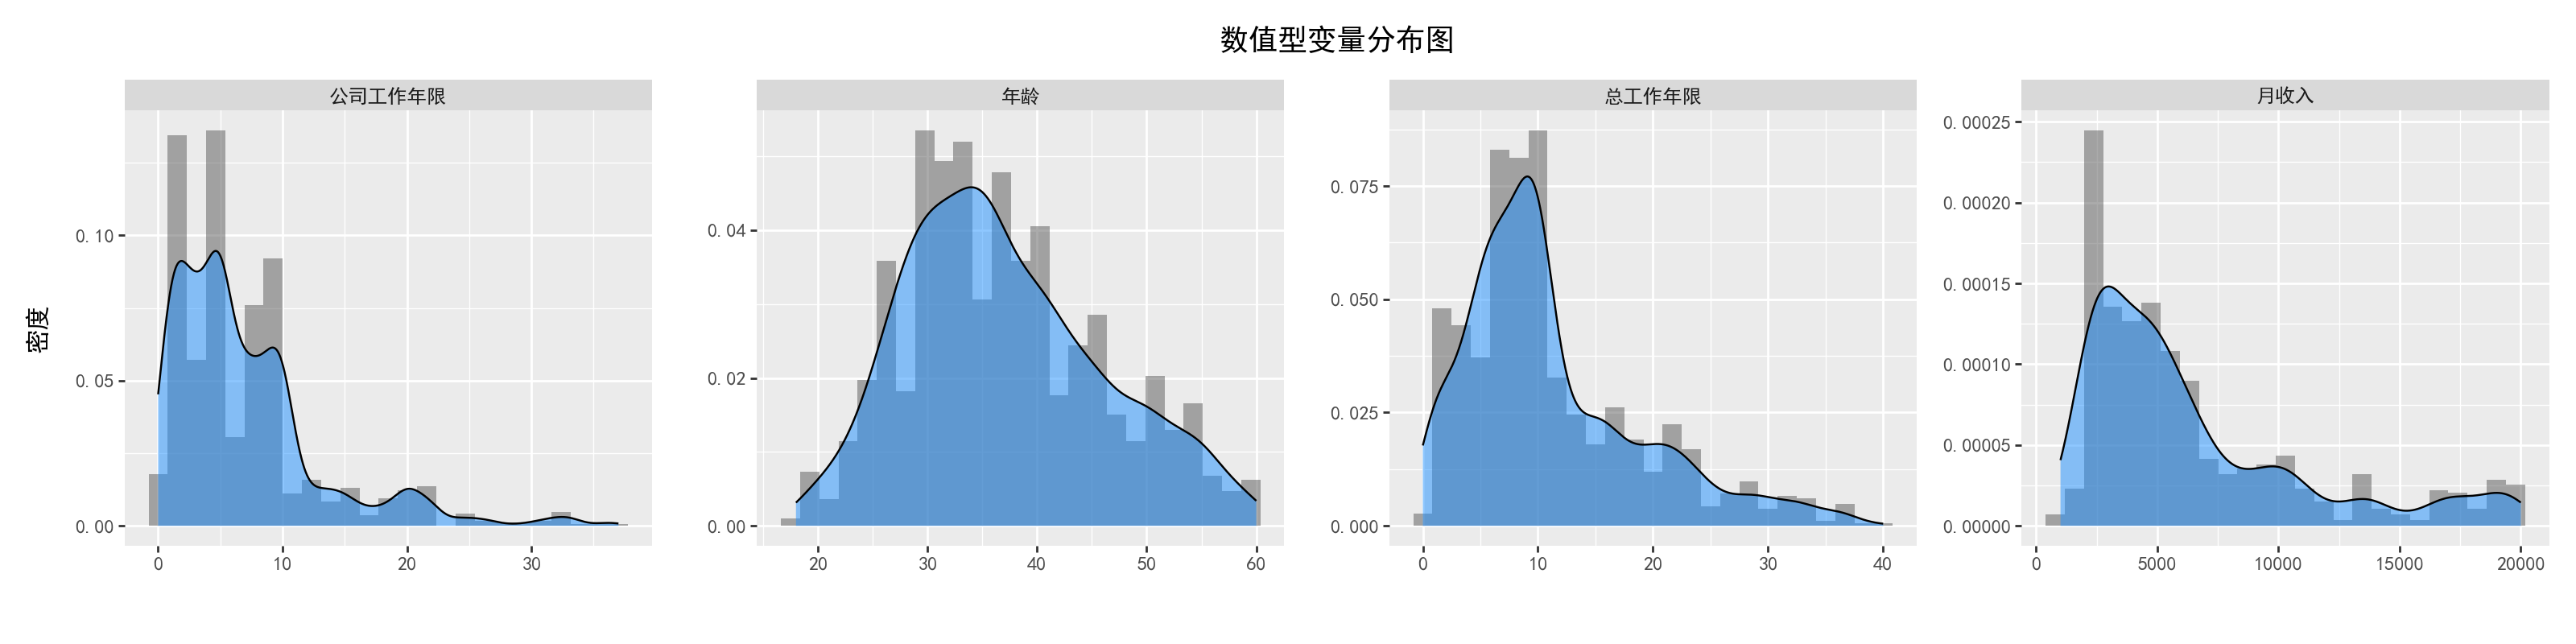

In [17]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, geom_density, after_stat, facet_wrap, theme, labs

# 选择变量名
cols_continuous2 = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

# 选择数值型变量
numeric_columns = df.loc[:, cols_continuous2]

# 将数据从宽格式转换为长格式
df_long = df.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

# 将英文变量名翻译成中文
variable_name_map = {
    'Age': '年龄',
    'MonthlyIncome': '月收入',
    'TotalWorkingYears': '总工作年限',
    'YearsAtCompany': '公司工作年限'
}
df_long['Variable'] = df_long['Variable'].map(variable_name_map)

# 绘制直方图和分布曲线
plot = (
    ggplot(df_long, aes(x='Value', y=after_stat('density')))
    + geom_histogram(bins=25, alpha=0.5)  # 直方图（保持原样式）
    + geom_density(alpha=0.5, fill='#1E90FF')  # 分布曲线（保持原样式）
    + facet_wrap('~ Variable', nrow=1, ncol=4, scales='free')  # 1×4 布局，x 轴独立
    + theme(figure_size=(16, 4))  # 设置图形大小
    + labs(y='密度', x = ' ', title='数值型变量分布图')  # 设置中文字符标签
    + theme(text=element_text(family="SimHei")) 
)

# 保存图形
plot.save('histogram_density_plots.png', dpi=180)

# 显示图形
print(plot)

C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 16 x 4 in image.
C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: qq_plots.png
C:\Windows\Temp\ipykernel_12240\4126028096.py:37: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


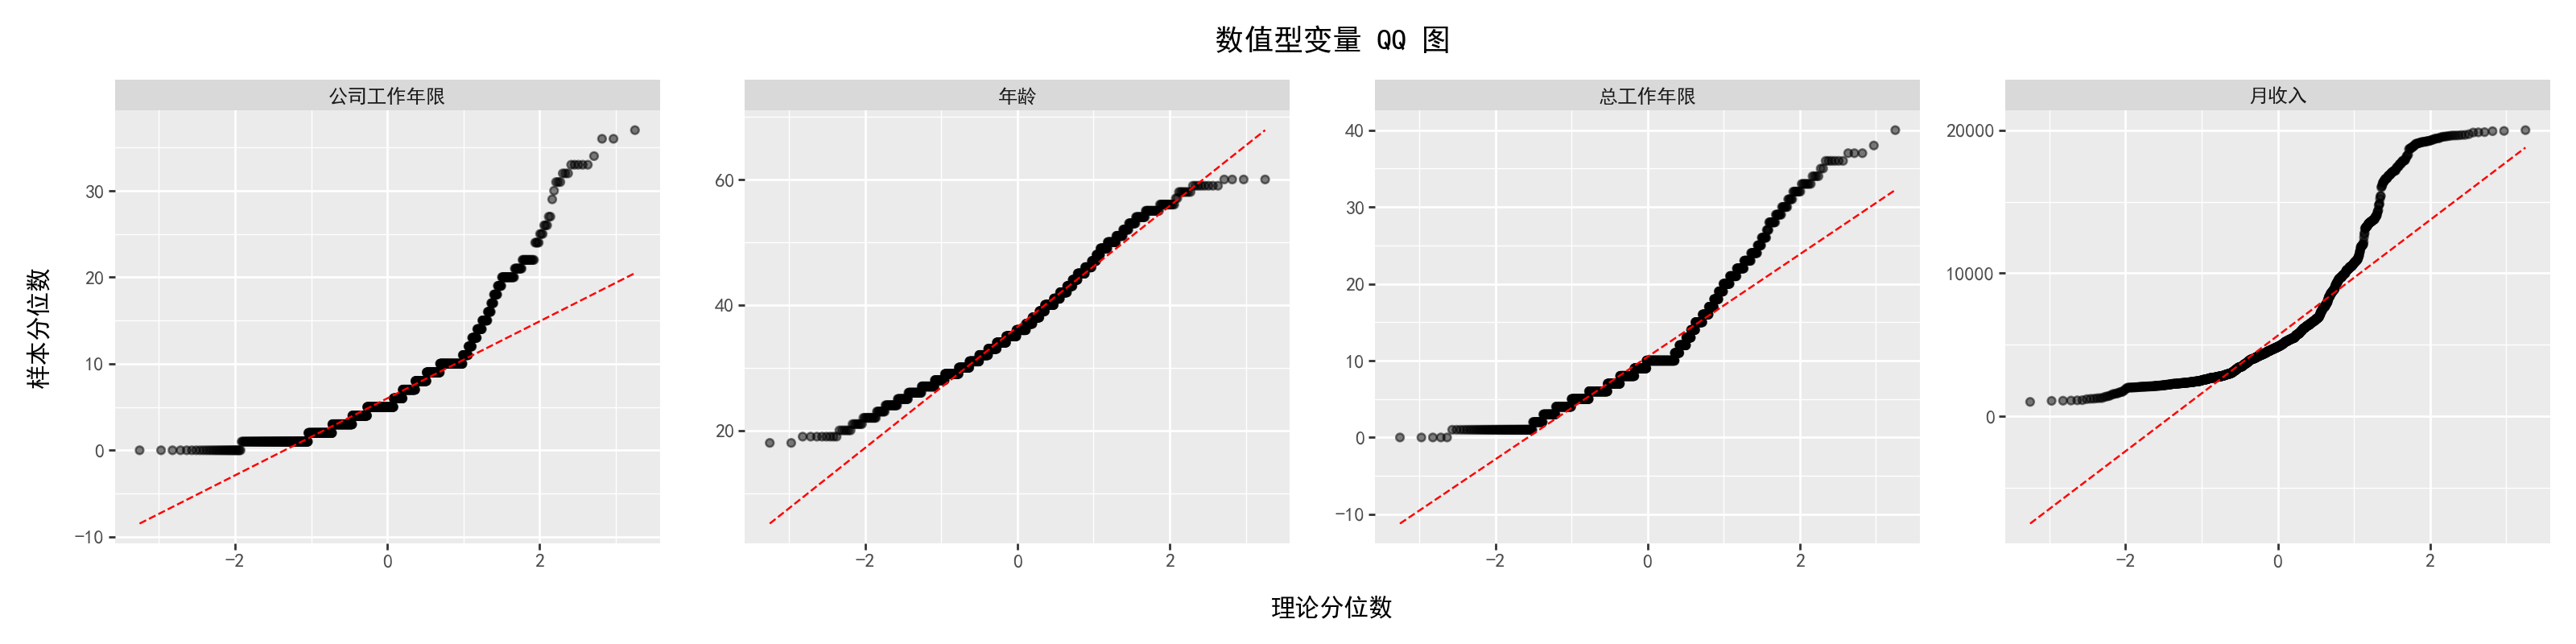

In [18]:
import pandas as pd
from plotnine import ggplot, aes, facet_wrap, theme, labs, stat_qq, stat_qq_line, element_text

# 选择变量名
cols_continuous2 = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

# 选择数值型变量
numeric_columns = df.loc[:, cols_continuous2]

# 将数据从宽格式转换为长格式
df_long = df.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

# 将英文变量名翻译成中文
variable_name_map = {
    'Age': '年龄',
    'MonthlyIncome': '月收入',
    'TotalWorkingYears': '总工作年限',
    'YearsAtCompany': '公司工作年限'
}
df_long['Variable'] = df_long['Variable'].map(variable_name_map)

# 绘制 QQ 图
plot = (
    ggplot(df_long, aes(sample='Value'))  # 使用 sample 参数绘制 QQ 图
    + stat_qq(alpha=0.5)  # 绘制 QQ 点
    + stat_qq_line(color='red', linetype='dashed')  # 绘制 QQ 参考线
    + facet_wrap('~ Variable', nrow=1, ncol=4, scales='free')  # 1×4 布局，x 轴独立
    + theme(figure_size=(16, 4))  # 设置图形大小
    + labs(x='理论分位数', y='样本分位数', title='数值型变量 QQ 图')  # 设置中文字符标签
    + theme(text=element_text(family="SimHei"))  # 设置中文字体
)

# 保存图形
plot.save('qq_plots.png', dpi=180)

# 显示图形
print(plot)

C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 16 x 4 in image.
C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: histogram_density_plots_log.png
C:\Windows\Temp\ipykernel_12240\3222855152.py:42: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


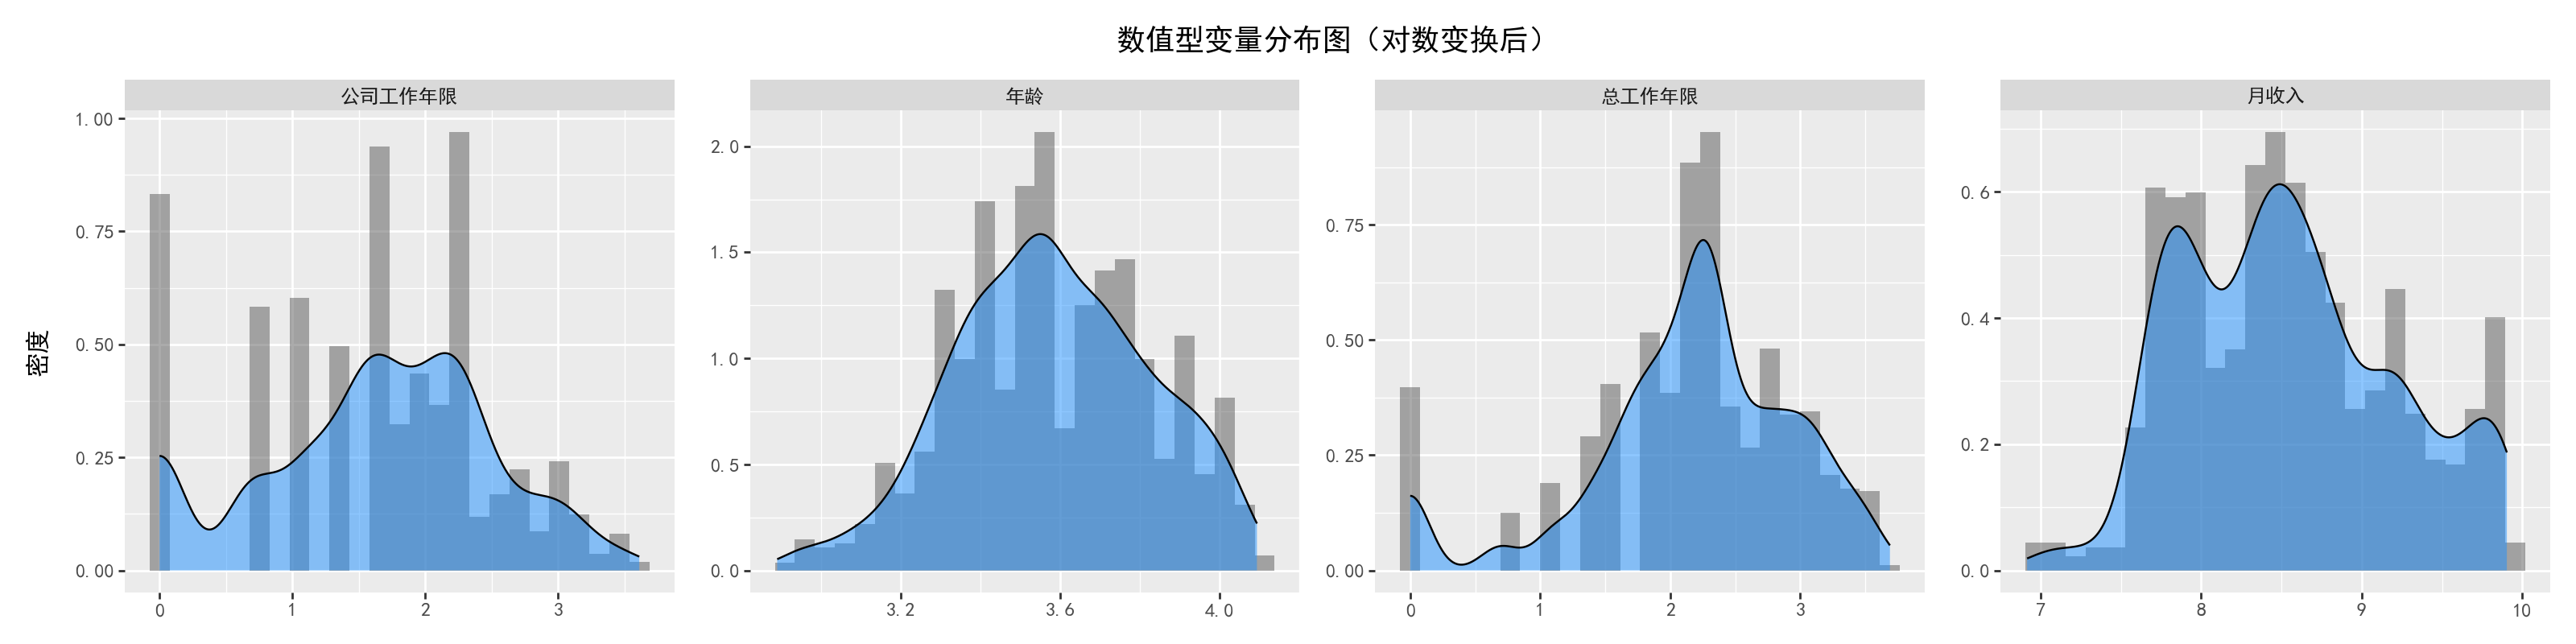

In [19]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_histogram, geom_density, after_stat, facet_wrap, theme, labs

# 选择数值型变量
numeric_columns = df.loc[:, cols_continuous2]

# 将数据从宽格式转换为长格式，并对数值取对数
df_long = df.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')
df_long['Value'] = df_long['Value'].apply(lambda x: np.log(x) if x > 0 else np.nan)  # 对正值取对数，忽略非正值

# 删除对数变换后的无效值（NaN）
df_long = df_long.dropna()

# 将英文变量名翻译成中文
variable_name_map = {
    'Age': '年龄',
    'MonthlyIncome': '月收入',
    'TotalWorkingYears': '总工作年限',
    'YearsAtCompany': '公司工作年限'
}
df_long['Variable'] = df_long['Variable'].map(variable_name_map)

# 绘制直方图和分布曲线
plot = (
    ggplot(df_long, aes(x='Value', y=after_stat('density')))
    + geom_histogram(bins=25, alpha=0.5)  # 直方图（保持原样式）
    + geom_density(alpha=0.5, fill='#1E90FF')  # 分布曲线（保持原样式）
    + facet_wrap('~ Variable', nrow=1, ncol=4, scales='free')  # 1×4 布局，x 轴独立
    + theme(figure_size=(16, 4))  # 设置图形大小
    + theme(text=element_text(family="SimHei")) 
    + labs(x='', y='密度', title='数值型变量分布图（对数变换后）')  # 设置中文字符标签
)

# 保存图形
plot.save('histogram_density_plots_log.png', dpi=180)

# 显示图形
print(plot)

C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 16 x 4 in image.
C:\Users\哀殿我女神\AppData\Roaming\Python\Python39\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: qq_plots_log.png
C:\Windows\Temp\ipykernel_12240\2289085964.py:39: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


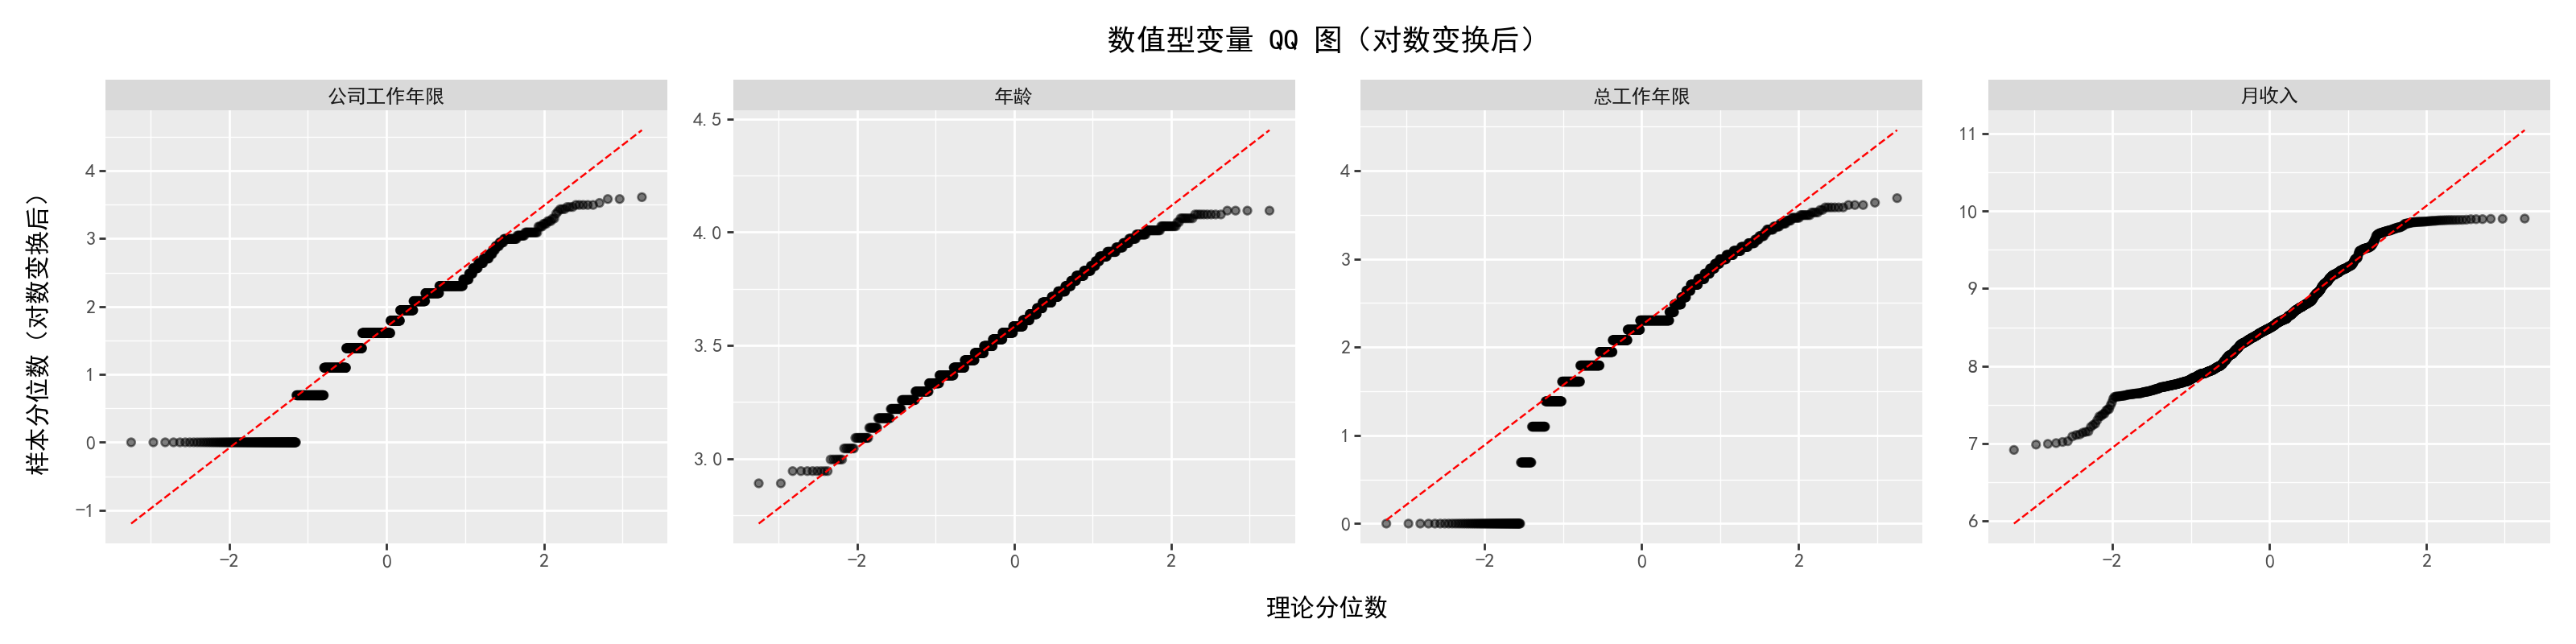

In [20]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, facet_wrap, theme, labs, stat_qq, stat_qq_line, element_text

# 选择数值型变量
numeric_columns = df.loc[:, cols_continuous2]

# 将数据从宽格式转换为长格式，并对数值取对数
df_long = df.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')
df_long['Value'] = df_long['Value'].apply(lambda x: np.log(x) if x > 0 else np.nan)  # 对正值取对数，忽略非正值

# 删除对数变换后的无效值（NaN）
df_long = df_long.dropna()

# 将英文变量名翻译成中文
variable_name_map = {
    'Age': '年龄',
    'MonthlyIncome': '月收入',
    'TotalWorkingYears': '总工作年限',
    'YearsAtCompany': '公司工作年限'
}
df_long['Variable'] = df_long['Variable'].map(variable_name_map)

# 绘制 QQ 图
plot = (
    ggplot(df_long, aes(sample='Value'))  # 使用 sample 参数绘制 QQ 图
    + stat_qq(alpha=0.5)  # 绘制 QQ 点
    + stat_qq_line(color='red', linetype='dashed')  # 绘制 QQ 参考线
    + facet_wrap('~ Variable', nrow=1, ncol=4, scales='free')  # 1×4 布局，x 轴独立
    + theme(figure_size=(16, 4))  # 设置图形大小
    + labs(x='理论分位数', y='样本分位数（对数变换后）', title='数值型变量 QQ 图（对数变换后）')  # 设置中文字符标签
    + theme(text=element_text(family="SimHei"))  # 设置中文字体
)

# 保存图形
plot.save('qq_plots_log.png', dpi=180)

# 显示图形
print(plot)

C:\Windows\Temp\ipykernel_12240\2411294470.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


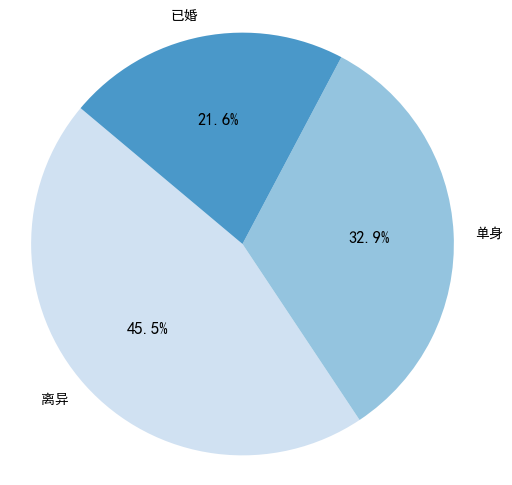

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib


matplotlib.rcParams['font.sans-serif']=['SimHei'] 

# 统计每种婚姻状态的频数
marital_counts = train['MaritalStatus'].value_counts()

# 将英文翻译为中文
labels = ['离异', '单身', '已婚']
sizes = marital_counts.values

# 获取蓝色主题的颜色映射
n_col = len(labels)  # 颜色数量
cmap = get_cmap('Blues', n_col*2)  
colors = [rgb2hex(cmap(i+1)[:3]) for i in range(cmap.N)]  # 转换为 Hex 颜色编码

# 绘制饼图
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10},  # 设置类别名称的字体大小
    pctdistance=0.6  # 调整百分比标签的位置
)

# 调节百分比数字的字体大小
for autotext in autotexts:
    autotext.set_fontsize(12)  # 设置百分比数字的字体大小


# 保持饼图为圆形
plt.axis('equal')

# 保存图形
plt.savefig('marital_status_pie.png', dpi=90)

# 显示图形
plt.show()



C:\Windows\Temp\ipykernel_12240\1275885326.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


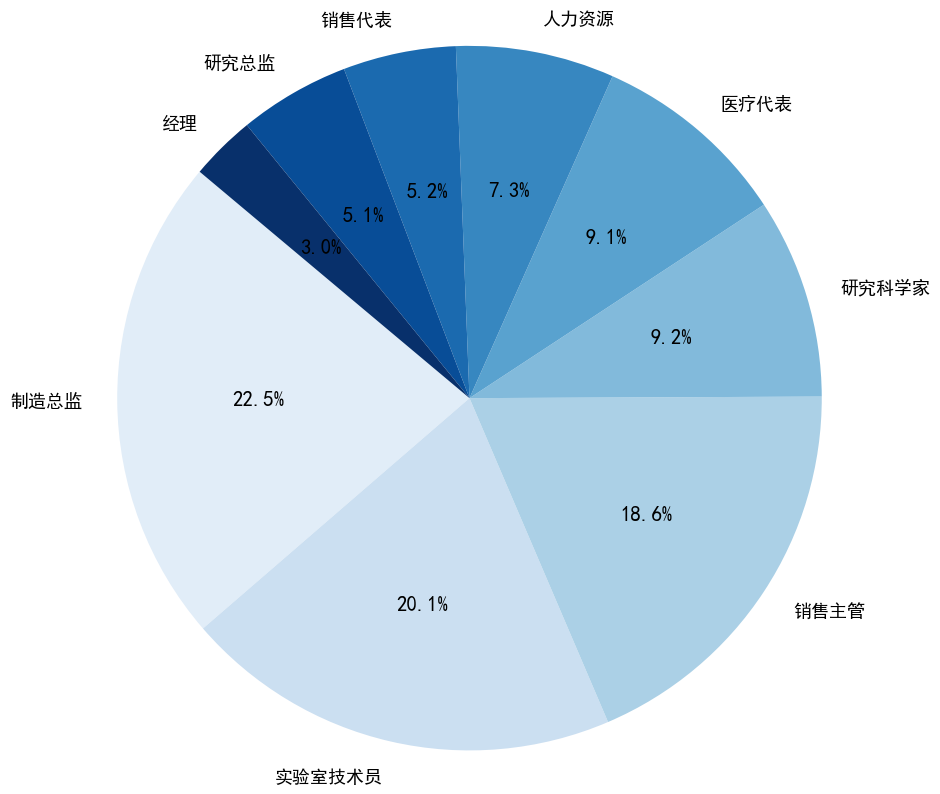

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib

# 设置中文环境
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 

# 假设 train 是你的数据集
# train = pd.read_csv('data.csv')

# 统计每种职位的频数
jobrole_counts = train['JobRole'].value_counts()

# 将英文翻译为中文
labels = ['制造总监', '实验室技术员', '销售主管', '研究科学家', 
          '医疗代表', '人力资源', '销售代表', '研究总监', '经理']
sizes = jobrole_counts.values

# 获取蓝色主题的颜色映射
n_col = len(labels)  # 颜色数量
cmap = get_cmap('Blues', n_col+1 )  # 获取 Blues 颜色主题
colors = [rgb2hex(cmap(i+1)[:9]) for i in range(n_col)]  # 转换为 Hex 颜色编码

# 绘制饼图
plt.figure(figsize=(10, 10))  # 调整图形大小以适应更多类别
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 13},  # 设置类别名称的字体大小
    pctdistance=0.6  # 调整百分比标签的位置
)

# 调节百分比数字的字体大小
for autotext in autotexts:
    autotext.set_fontsize(15)  # 设置百分比数字的字体大小

# 保持饼图为圆形
plt.axis('equal')

# 保存图形
plt.savefig('jobrole_pie.png', dpi=200)  # 提高保存图像的分辨率

# 显示图形
plt.show()